In [1]:
#Linear Regression : -

#work on dataset Advertising.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset 
df=pd.read_csv("advertising.csv")

#to show first 5 records
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
#To remove unwanted column here unwanted column : Unnamed: 0 permanently
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


TV           0
radio        0
newspaper    0
sales        0
dtype: int64


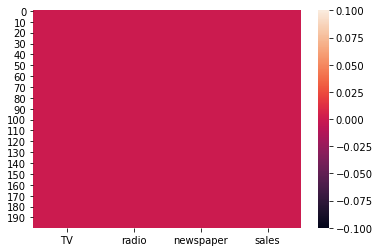

In [5]:
#We predict sales means contineous numerical value means apply regression
#algorithm

#First check null values 
print(df.isnull().sum())

#visualise 
sns.heatmap(df.isnull())
plt.show()

In [6]:
#check datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


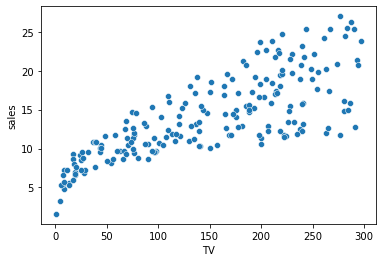

In [7]:
#To check relation between input and output
#First check relation between input : TV and output sales with the help of 
#scatter plot
sns.scatterplot(data=df,x="TV",y="sales")
plt.show()

In [8]:
#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)

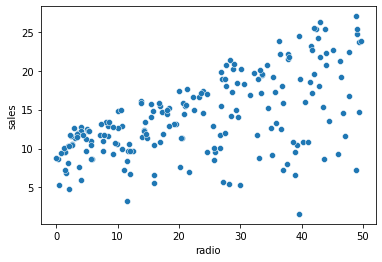

In [9]:
#secondly check relation between input : radio and output sales with the help of 
#scatter plot
sns.scatterplot(data=df,x="radio",y="sales")
plt.show()

In [10]:
#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV

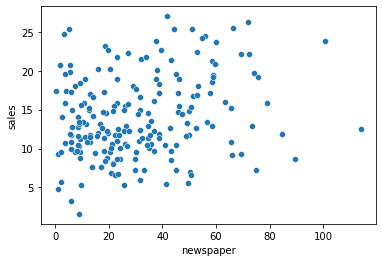

In [11]:
#visualise scatter plot 
#here X="newspaper"  here X means input and Y="sales" hete Y output means target
sns.scatterplot(data=df,x="newspaper",y="sales")#x=input variable and y=output variable
plt.show()

In [12]:
#It is very bed correlation means no +ve corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered 

In [13]:
#check correlation between input and output
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


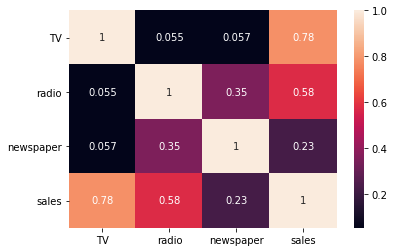

In [14]:
#Visualise corr() value
sns.heatmap(df.corr(),annot=True)
plt.show()#correlation values with TV and sales=0.78 , It is very good
#correlation values with radio and sales=0.58 , It is good(ok)
#correlation values with newspaper and sales=0.23 , It is very bad

In [15]:
#correlation values with TV and sales=0.78 , It is very good
#correlation values with radio and sales=0.58 , It is good(ok)
#correlation values with newspaper and sales=0.23 , It is very bad

In [16]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

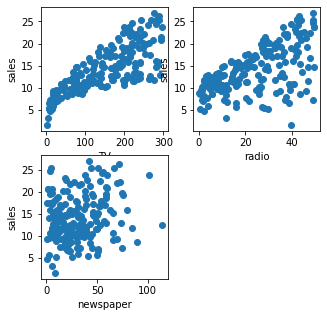

In [17]:
X=  ['TV', 'radio', 'newspaper'] #column name
Y=df["sales"]
plt.figure(figsize=(5,5))
for i,col in enumerate(X): #enumerate() : to return 2 values from list
    #1. index 2. value at index
    plt.subplot(2,2,i+1) #subplot(rows,cols)
    plt.xlabel(col)
    plt.ylabel("sales")
    plt.scatter(df[col],Y) #plt.scatter(X,Y)
    
plt.show()

In [18]:
#Performing the modeling 
#Modeling with input : TV and output sales 
#SLR : only one input
#Select input and output from dataset
X=df[["TV"]] #input always 2D array [[]]
Y=df["sales"]

In [19]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [20]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [21]:
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
#train_test_split()  : this function define in inbuilt class
#train_test_split class
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
X_train.shape

(140, 1)

In [24]:
Y_train.shape

(140,)

In [25]:
X_test.shape

(60, 1)

In [26]:
Y_test.shape

(60,)

In [27]:
X_train.head(20)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [28]:
X_test.head(20)

,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8
198,283.6
95,163.3
4,180.8
29,70.6
168,215.4


In [29]:
#Perform the Linear regression  model
#call LinearRegression class
from sklearn.linear_model import LinearRegression

In [30]:
#Create a object of LinearRegression class
lr=LinearRegression()

In [31]:
#Train the model (70% training data )with the help of LinearRegression class :
#use inbuilt method fit()
lr.fit(X_train,Y_train)

LinearRegression()

In [32]:
#check slope/coefficeint and intercept
print("slope : ",lr.coef_)  #Y=m*TV+b
print("Intercept : ",lr.intercept_)

slope :  [0.04812204]
Intercept :  6.923519536059554


In [33]:
#Testing the model 
#perform the testing use predict() inbuilt method of LinearRegression class
Y_pred=lr.predict(X_test) #Y_pred=m*TV+b
print(Y_pred)

[17.06764591 16.66823297 11.52879892 20.4073156  19.1368937  20.57093054
 14.78184893 15.62398466 10.32093567 17.2890073  14.83959538 10.25356482
 17.25532187 12.20731971 17.78947654 12.97246017 13.26119242 20.91259704
  8.1554438  17.06283371 11.75497252 10.18619396  8.13138278 12.09182681
 12.35649804 15.98971218  8.99757953 18.89628349 14.95027608 18.47762173
 18.46799732 18.2081383  14.12738917 15.11389102 18.87703468 15.82128503
 17.62586159 13.15051172 17.35637816  7.86671155  7.55391828 11.2737521
  7.82340171 16.74522823  7.27481044 14.01189627 10.68666319 17.89534503
 16.78853807 17.96752809 20.864475   12.84734286  7.85708714 15.71060434
 19.70473379 14.89252963 17.43818563  8.12657058 18.0926454   8.99276733]


In [34]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

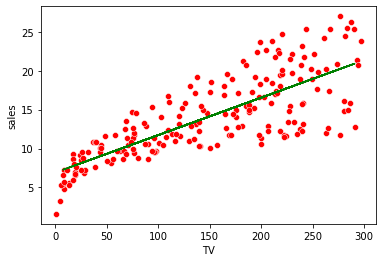

In [35]:
#Lecture 2-Aug-2021
#Visualise predicted line
sns.scatterplot(data=df,x="TV",y="sales",color="red")
plt.plot(X_test,Y_pred,color="green") #plot(input,output)
plt.show()

In [36]:
#Check mean squared error , call mean_squared_error inbuilt class which
#define in sklearn.metrics
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred)

10.571057434656955

In [37]:
#Evalution of model : find r2-score means r-squared (0-1)
#r2_score inbuilt class which define in sklearn.metrics 
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred) #just fine means ok . no good and no bed

0.575061860494331

In [38]:
#Performing the modeling With the help of Simple Linear Regression 
#Modeling With input radio and target sales
#Step 1: First input means X and output Y(target)
X=df[["radio"]] #always input 2D [[]]
Y=df["sales"] #always output means target 1D 

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [40]:
#Create a object of LinearRegression class
lr1=LinearRegression()

In [41]:
#train the model 
lr1.fit(X_train,Y_train)

LinearRegression()

In [42]:
#check slope/coefficeint and intercept
print("slope : ",lr1.coef_)  #Y=m*TV+b
print("Intercept : ",lr1.intercept_)

slope :  [0.1874808]
Intercept :  9.440936561425886


In [43]:
#Testing the model 
#perform the testing use predict() inbuilt method of LinearRegression class
Y_pred=lr1.predict(X_test) #Y_pred=m*TV+b
print(Y_pred)

[18.73998434 13.62175845  9.70340968 11.33449266 13.43427764 17.31513024
 15.3653299  11.46572922 12.44062939 13.86548349 13.35928532 13.284293
 13.94047581 18.4025189  10.97827914 16.35897815 12.89058332 10.20960785
 16.75268784 14.97162022 11.24075226 16.30273391 14.25919317 12.06566779
 12.70310252 12.83433908 14.44667397 14.5216663  17.31513024 12.57186595
 17.22138984 10.07837129 16.11525311 10.90328682 15.10285678 13.3780334
 10.07837129 10.50957713 17.67134377 13.20930068  9.51592888  9.4971808
 11.70945427 15.60905495 14.7091471  13.92172773 18.21503809 16.5089628
 17.89632073 15.49656647 17.37137449 15.92777231 12.44062939 18.10254961
 13.1905526  11.31574458 10.45333289 11.50322538 11.05327146 14.29668933]


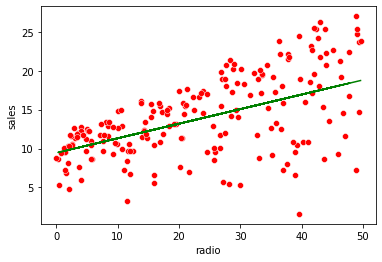

In [44]:
#Visualise predicted line
sns.scatterplot(data=df,x="radio",y="sales",color="red")
plt.plot(X_test,Y_pred,color="green") #plot(input,output)
plt.show()

In [45]:
mean_squared_error(Y_test,Y_pred)

14.604130559272193

In [46]:
#Evaluation of model
r2_score(Y_test,Y_pred)

0.41293932917162335

In [47]:
#Performing the modeling With the help of Simple Linear Regression 
#Modeling With input newspaper and target sales
#Step 1: First input means X and output Y(target)
X=df[["newspaper"]] #always input 2D [[]]
Y=df["sales"] #always output means target 1D 

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [49]:
#Create a object of LinearRegression class
lr2=LinearRegression()

In [50]:
#train the model 
lr2.fit(X_train,Y_train)

LinearRegression()

In [51]:
#check slope/coefficeint and intercept
print("slope : ",lr2.coef_)  #Y=m*TV+b
print("Intercept : ",lr2.intercept_)

slope :  [0.06532045]
Intercept :  11.82966888487788


In [52]:
#Testing the model 
#perform the testing use predict() inbuilt method of LinearRegression class
Y_pred=lr2.predict(X_test) #Y_pred=m*TV+b


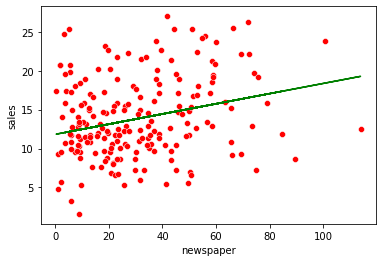

In [53]:
#Visualise predicted line
sns.scatterplot(data=df,x="newspaper",y="sales",color="red")
plt.plot(X_test,Y_pred,color="green") #plot(input,output)
plt.show()

In [54]:
mean_squared_error(Y_test,Y_pred)

25.497452374414927

In [55]:
#Evaluation of model
r2_score(Y_test,Y_pred)

-0.024953278429509007

In [56]:
''' 
slope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578
slope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41
slope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02
'''

' \nslope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578\nslope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41\nslope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02\n'

In [57]:
#multiple linear regression means many input but output only one 
#Equation of MLR  :   Y_pred=m1X1+m2X2+m3X3+......+mnXn+b
#select input and output from dataset : df
X=df[["TV","radio","newspaper"]] #input features always 2D
Y=df["sales"] #target means output : 1D

In [58]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [59]:
X_train.head()

,TV,radio,newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [60]:
X_train.shape

(140, 3)

In [61]:
#perform the model 
#Create a object of LinearRegression class
lr=LinearRegression()

In [62]:
#train the model use fit() 
lr.fit(X_train,Y_train)

LinearRegression()

In [63]:
#check slope/coefficient and intercept
print("slope : ",lr.coef_)  #Y=m1*TV+m2*radio+m3*newspaper+b
print("Intercept : ",lr.intercept_)

slope :  [0.04695205 0.17658644 0.00185115]
Intercept :  2.937215734690609


In [64]:
#slope of TV : 0.04812204 (if take only input TV with output sales)
#slope of radio :0.1874808 (if take only input radio with output sales)
#slope of newspaper : 0.06532045 (if take only input newspaper with output sales)

In [65]:
#Testing the model 
#perform the testing use predict() inbuilt method of LinearRegression class
Y_pred=lr.predict(X_test) #Y=m1*TV+m2*radio+m3*newspaper+b

In [66]:
mean_squared_error(Y_test,Y_pred)

1.9289249074665729

In [67]:
#Evaluation of model
r2_score(Y_test,Y_pred)

0.9224605706201435

In [68]:
#here r2-score is best because nearest to +1 and MSE is very low means we
#create a successful model

In [69]:
#But 
# Assumptions of Linear Regression : -
'''1. should not be Multicolinearity in linear regression  
 Solve this assumption .means we removed the Multicolinearity situation
 2. Assumption :  Linear relationship means There should be a linear relation
 ship. 
 when does linear regression do best work ? 
 where got better relationship 
 
 we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error means 
 Residual =(actual output-predicted output)
 '''

'1. should not be Multicolinearity in linear regression  \n Solve this assumption .means we removed the Multicolinearity situation\n 2. Assumption :  Linear relationship means There should be a linear relation\n ship. \n when does linear regression do best work ? \n where got better relationship \n \n we cannot see 3D graph on system so we have some hack(trick) , how to \n check input and output both are related or not\n we calculate the residual (this is error means \n Residual =(actual output-predicted output)\n '

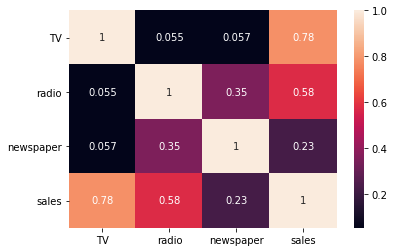

In [70]:
#Visualise corr() value
sns.heatmap(df.corr(),annot=True)
plt.show()

In [71]:
#here input radio and newspaper both are corelated each other value of corr 
#between radio and newspaper =0.35 means multicolinearity situation occurs
#so check corr of both input radio and newspapaer with o/p and remove those 
#input column whose corr value with o/p will be less 
#here newspaper is less correlated with o/p sales as compared to radio with
#sales so remove newspaper from dataset 
#and perform TV and radio with sales

In [72]:
#Assumption of Linear Regression 
#1. there should be a linear relationship
#2. if occur linear relation then next check relation is homoskedatik 
#not a heteroskedastik

In [73]:
#trick
#find the residuals 
residuals=Y_test-Y_pred
print(residuals)

58     2.136817
40     0.158621
34     1.808554
102   -3.116317
184   -1.070471
198    1.708007
95     0.617457
4     -0.541387
29     1.347060
168   -0.224753
171    0.060771
18     1.459805
11     0.136701
89     0.071469
110   -1.691587
118    0.398261
159    0.465959
35    -4.525915
136   -1.543275
59     0.343472
51     1.346905
16    -0.294660
44    -0.234138
94     1.027747
31     0.517840
162   -0.126586
38     0.359318
28    -0.546769
193    1.407888
27    -1.301787
47     1.636405
165   -2.804843
194    1.036479
177   -0.670989
176    0.229407
97     0.132310
174   -2.503995
73     0.922706
69     1.381084
172    0.161667
108    1.629688
107    1.422396
189    0.704768
14     0.585025
56    -2.818682
19     0.490975
114   -0.336976
39     1.141172
185    2.037284
124    0.146192
98     1.296391
123    0.350142
119   -0.114749
53     1.422384
33    -1.539964
179    0.089081
181   -2.000527
106    1.091553
199   -1.969534
138    0.032309
Name: sales, dtype: float64


In [74]:
Y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

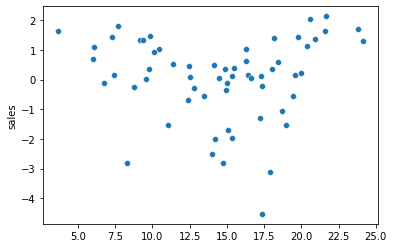

In [75]:
#visualize scatterplot between Y_pred and residuals means 
#here input x=Y_pred  and y=residuals because residuals depend on y_pred value
plt.figure()
sns.scatterplot(Y_pred,residuals)

plt.show()

In [76]:
#work on first assumption
#First there should be no multicolinearity
# Multicolinearity means here radio is correlated with sales and newspaper (I/P)
#is correlated with radio(Input) corr value 0.35 that means indirectly newspaper
#also getting corelated with sales
#here correlated with newspaper and sales =0.23 it is bad correlation
#So in this case , remove any one input(radio and newspaper)but which input
#will be remove so we remove those input whose bad correlation with output
#here newspaper is bad correlated with output sales then remove newspaper 
#column means newspaper column input is not imp to predict the value
#of sales(o/p)

In [77]:
#corr value of radio with sales :  0.58  
#corr value of newspaper with sales : 0.23
#corr value of radio and newspaper(both are input and correlated each other:0.35
#so we decided , remove newspaper because corr of radio with sales>newspaper with sales
#We have input TV and radio and target sales
X=df[["TV","radio"]] #input TV and radio : 2D array
Y=df["sales"] #output which want to predict : always 1 D array

In [78]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [79]:
#create the object of LinearRegression class
lr=LinearRegression()

In [80]:
#we train the model : use fit() inbuilt function of LinearRegression class
#fit() passing arguments/parameters which pass input and labeeled output(70%)
lr.fit(X_train,Y_train)

LinearRegression()

In [81]:
#check slope means coefficient 
lr.coef_    #remain same as previous if remove input newspaper 
#means no any effect of newspaper for prediction of sales

array([0.04697554, 0.17765046])

In [82]:
#slope :  [0.04695205 0.17658644 0.00185115] if take tv,radio and newspaper
#slope : [0.04697554, 0.17765046]  if remove newspaper means no effect the
#value of slope of tv and radio

In [83]:
#find intercept
lr.intercept_   
#intercept remain same as previous if take TV,radio and newspaper

2.9647671191401574

In [84]:
#Test the model means use inbuilt function predict()  : inbuilt method of
#LinearRegression class
#perform testing
Y_pred=lr.predict(X_test) #Y_pred=m1*x_test_TV+m2*X_test_radio+b

In [85]:
MSE=mean_squared_error(Y_test,Y_pred)#mean_squared_error() inbuilt function
#which define in inbuilt class mean_squared_error , it is passing arguments
#type function
print("Mean_Squared_Error : ",MSE)

Mean_Squared_Error :  1.9147050289721788


In [86]:
score=r2_score(Y_test,Y_pred)
print("R2-score : ",score)  #range of r2-score :   0 to +1 
#it is very good score because nearest to +1

R2-score :  0.9230321850256801


In [87]:
#2 assumption  : there should be linear relationship between input and output
#how to check linear relation between input X=[["TV","radio"]] and Y="sales"
#means visualize scatter plot 
#find the residuals 
residuals=Y_test-Y_pred
print(residuals)

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64


In [88]:
print(Y_pred)

[21.6786746  16.43892004  7.70903733 17.92158421 18.67111499 23.74835071
 16.24962798 13.37657045  9.12364788 17.27585015 14.40513872  9.85730919
 17.31402746 16.61437382 15.02857874 15.42489496 12.42021473 17.34892466
 11.09570896 18.10320281  9.38655615 12.65171582  8.70947008 10.49704698
 11.35942404 15.03043294  9.73268033 19.46660993 18.26160716 17.21035792
 21.60669421 14.58454377 16.32136242 12.3456783  19.99853614 15.38120487
 14.01613968 10.05601014 20.94792024  7.45626202  3.65120693  7.26465144
  5.99278035 18.39717578  8.2996665  14.13011074 14.95229617 20.37261349
 20.60678937 19.48376432 24.08819667 14.89416249  6.71850002 19.74995269
 18.99448081 12.52042181 14.18823598  6.09331077 15.39558485  9.58586241]


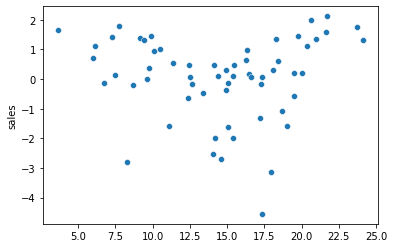

In [89]:
#visualize scatterplot between y_pred and residuals means 
#here input x=Y_pred  and y=residuals because residuals depend on Y_pred value
plt.figure()
sns.scatterplot(Y_pred,residuals)

plt.show()

In [90]:
# in above scatterplot, This is not a linear relation between Y_pred
# and residules means no relation between x=["TV","radio"] with sales o/p
#means this assumption is not fullfill

In [91]:
#3. Assumption :  if occur linear relation then next check relation is 
#homoskedastik not a heteroskedastik

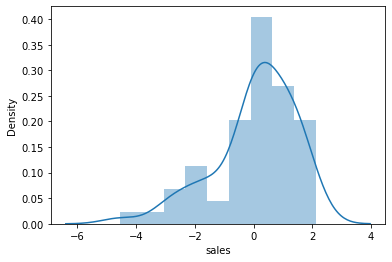

-1.065988117969208
0.05823718098512029


In [92]:
#4. Assumption of linear regression : - Residuals should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot()
plt.figure()
sns.distplot(residuals)
plt.show()
from scipy.stats import skew
print(skew(residuals))
print(np.mean(residuals))

In [93]:
#In above distplot curve , -ve skewness found means no normal distributed curve
#found means it is a AS-symmetric curve means this assumption is not fullfill

In [94]:
#here we handled multicolinearity (removed multicolinearity (problem)
#but not working 3 assumption 
#means no relation relationship means here create a curve
##relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve

In [95]:
#increase the degress of X means increase the power of X means independent vairable
#if increasing the degree or power of independent variable then It is called
#polynomial Linear regression(PLR)

In [96]:
#PLR : polynomial linear regression

In [97]:
#Demo of PLR
#create numpy 1D array
X=np.arange(-100,100) #arange() inbuilt function here start=-100 ,
#stop=100-1=99 and step=+1 by defualt X=-100,-99,-98,....0,2,3,....99
print(X) 

[-100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79   80   81
   82   83   84   85   86   87   88   89   90   91   92   93   94   95
   96 

In [98]:
#create user defined function for different power of independent variable X
#Linear  means degree/power=1 of independent variable X means Y=mX+b
def poly_1(X):  #here poly_1()  user defined function it is passing argument 
    #and return value and here X independent variable
    m=4 #slope /gradient/coef 
    b=5 #intercept
    Y=m*X+b
    return Y  #return output

In [99]:
#Main program
#call function
#call function poly_1
Y=poly_1(X) #Y dependent variable
#print(Y)

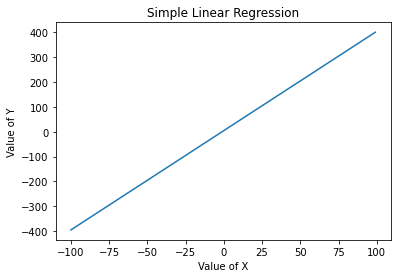

In [100]:
#Visualise the input X and output Y
plt.plot(X,Y)
plt.title("Simple Linear Regression")
plt.xlabel("Value of X")
plt.ylabel("Value of Y")
plt.show()

In [101]:
#Quadratic if degree/power of independent variable X=2
#AX^2+BX^1+C=0
def poly_2(X): #here poly_2()  user defined function it is passing argument 
    #and return value and here X independent variable
    m1=6 #suppose coefficient of X^2 =m1
    m2=4 #suppose coefficient of X^1 =m2
    b=5  #suppose intercept b=5
    Y=m1*X**2+m2*X+b
    return Y


In [102]:
#Main program
#call function poly_2
Y=poly_2(X) #Y dependent variable
print(Y)

[59605 58415 57237 56071 54917 53775 52645 51527 50421 49327 48245 47175
 46117 45071 44037 43015 42005 41007 40021 39047 38085 37135 36197 35271
 34357 33455 32565 31687 30821 29967 29125 28295 27477 26671 25877 25095
 24325 23567 22821 22087 21365 20655 19957 19271 18597 17935 17285 16647
 16021 15407 14805 14215 13637 13071 12517 11975 11445 10927 10421  9927
  9445  8975  8517  8071  7637  7215  6805  6407  6021  5647  5285  4935
  4597  4271  3957  3655  3365  3087  2821  2567  2325  2095  1877  1671
  1477  1295  1125   967   821   687   565   455   357   271   197   135
    85    47    21     7     5    15    37    71   117   175   245   327
   421   527   645   775   917  1071  1237  1415  1605  1807  2021  2247
  2485  2735  2997  3271  3557  3855  4165  4487  4821  5167  5525  5895
  6277  6671  7077  7495  7925  8367  8821  9287  9765 10255 10757 11271
 11797 12335 12885 13447 14021 14607 15205 15815 16437 17071 17717 18375
 19045 19727 20421 21127 21845 22575 23317 24071 24

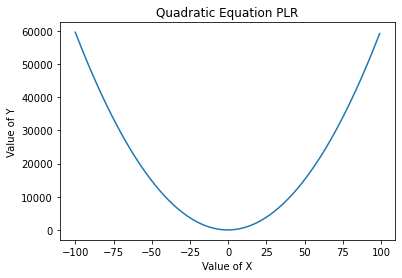

In [103]:
#Visualise the input X and output Y
plt.plot(X,Y)
plt.title("Quadratic Equation PLR")
plt.xlabel("Value of X")
plt.ylabel("Value of Y")
plt.show()

In [104]:
#Cubic if degree/power of independent variavle X=3
#Y=m1*X**3+m2*X**2+m3*X**1+b
#Y=8*(-100)**3+6*(-100)**2+
def poly_3(X): #here poly_3()  user defined function it is passing argument 
    #and return value and here X independent variable
    m1=8 #suppose coefficient of X^3 =m1
    m2=6 #suppose coefficient of X^2 =m2
    m3=4 #suppose coefficient of X^1 =m3
    b=5  #suppose intercept b=5
    Y=m1*X**3+m2*X**2+m3*X+b
    #cubic equation ax^3+bx^2+cx^1+d=0 means a=m1 b=m2 c=m3 and d=intercept=b
    return Y

[-7940395 -7703977 -7472299 -7245313 -7022971 -6805225 -6592027 -6383329
 -6179083 -5979241 -5783755 -5592577 -5405659 -5222953 -5044411 -4869985
 -4699627 -4533289 -4370923 -4212481 -4057915 -3907177 -3760219 -3616993
 -3477451 -3341545 -3209227 -3080449 -2955163 -2833321 -2714875 -2599777
 -2487979 -2379433 -2274091 -2171905 -2072827 -1976809 -1883803 -1793761
 -1706635 -1622377 -1540939 -1462273 -1386331 -1313065 -1242427 -1174369
 -1108843 -1045801  -985195  -926977  -871099  -817513  -766171  -717025
  -670027  -625129  -582283  -541441  -502555  -465577  -430459  -397153
  -365611  -335785  -307627  -281089  -256123  -232681  -210715  -190177
  -171019  -153193  -136651  -121345  -107227   -94249   -82363   -71521
   -61675   -52777   -44779   -37633   -31291   -25705   -20827   -16609
   -13003    -9961    -7435    -5377    -3739    -2473    -1531     -865
     -427     -169      -43       -1        5       23      101      287
      629     1175     1973     3071     4517     6

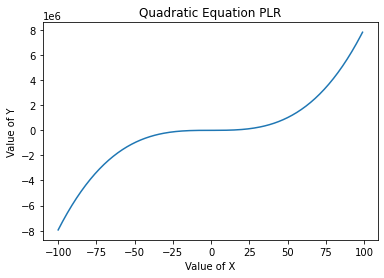

In [105]:
#Main program
#call function poly_3
Y=poly_3(X) #Y dependent variable
print(Y)

#Visualise the input X and output Y
plt.plot(X,Y)
plt.title("Quadratic Equation PLR")
plt.xlabel("Value of X")
plt.ylabel("Value of Y")
plt.show()

In [106]:
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#equation Y=m1*TV**2+m2*TV+m3*radio**2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1**2+bx1+cx2**2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV**2+m2*TV**1+m3*radio**2+m4*radio**1+b

In [107]:
X=df[["TV","radio"]]
Y=df["sales"]

In [108]:
#call PolynomialFeatures inbuilt class which define in sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [109]:
#create the object of PolynomialFeatures class and pass the degree of 
#independent variable X
pf=PolynomialFeatures(2)  #here 2 is a degree means pass how much degree 

In [110]:
#we create polynomial version of X so we call fit_transform() : inbuilt
#method of PolynomialFeatures class
X_poly=pf.fit_transform(X)

In [111]:
X_poly

array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 5.294601e+04,
        8.697780e+03, 1.428840e+03],
       [1.000000e+00, 4.450000e+01, 3.930000e+01, 1.980250e+03,
        1.748850e+03, 1.544490e+03],
       [1.000000e+00, 1.720000e+01, 4.590000e+01, 2.958400e+02,
        7.894800e+02, 2.106810e+03],
       ...,
       [1.000000e+00, 1.770000e+02, 9.300000e+00, 3.132900e+04,
        1.646100e+03, 8.649000e+01],
       [1.000000e+00, 2.836000e+02, 4.200000e+01, 8.042896e+04,
        1.191120e+04, 1.764000e+03],
       [1.000000e+00, 2.321000e+02, 8.600000e+00, 5.387041e+04,
        1.996060e+03, 7.396000e+01]])

In [112]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,
                                               random_state=1)

In [113]:
#Create the object of LinearRegression
lr=LinearRegression()

In [114]:
#Train the model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [115]:
#we testing the model means prediction
Y_pred=lr.predict(X_test)

In [116]:
#mean square error
print("Mean Squared Error : ",mean_squared_error(Y_test,Y_pred))

Mean Squared Error :  0.17238345081000733


In [117]:
#Error is very less as previous [Mean_Squared_Error :  1.9147050289721788]

In [118]:
#r2-score 
print("R squared score : ",r2_score(Y_test,Y_pred))

R squared score :  0.9930704848288293


In [119]:
#Great r2-score  It is closest to +1

In [120]:
#work on assumption 
#create the Normal distributed curve with the help of residuals
#find residuals
residuals=Y_test-Y_pred

In [121]:
print("skewness : ",skew(residuals))

skewness :  0.5111613178351139


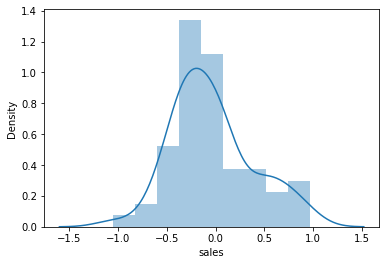

In [122]:
#plot normal distribution curve
plt.figure()
sns.distplot(residuals)
plt.show()

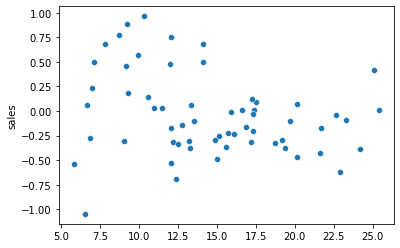

In [123]:
#next assumption 
#there should be a linear regression
#plot scatter plot 
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

In [124]:
#here this is linear relation ship between residuals and Y_pred 
#means input and output are related to each other
#but datpoints are scattered means heteroskadastic but should be homoskedastik
#means datapoints are close each other

In [125]:
#Y=m1*TV**3+m2*TV**2+m3*TV**1+m4*radio**3+m5*radio**2+m6*radio**1+b